In [1]:
# importing the necessary packages & dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr
import seaborn as sns

df = pd.read_excel("Inducted.xlsx", index_col=0)
df.columns

Index(['Name', 'G', 'AB', 'PA', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'HBP', 'SH', 'SF',
       'GIDP', 'BB%', 'K%', 'ISO', 'BABIP', 'RC', 'Inducted'],
      dtype='object')

In [2]:
# Separating out the y variable from the df
Y = df['Inducted']

# Separating out the columns that need to be normalized
data = df[['G', 'AB', 'PA', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'HBP',                      'SH', 'SF', 'GIDP', 'BB%', 'K%', 'ISO', 'BABIP', 'RC']]

# Holding onto the Names of players
df1 = df[['Name']]

data.median()

G         480.000
AB       1433.500
PA       1602.500
R         177.000
H         373.000
1B        257.000
2B         64.000
3B          8.000
HR         28.000
RBI       158.000
SB         15.000
CS         11.000
BB        118.000
SO        234.000
BA          0.256
OBP         0.319
SLG         0.385
OPS         0.707
TB        550.000
HBP         9.000
SH          9.000
SF         11.000
GIDP       29.000
BB%         0.078
K%          0.159
ISO         0.127
BABIP       0.289
RC        174.675
dtype: float64

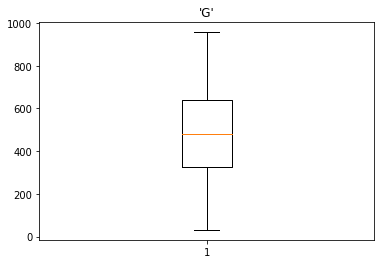

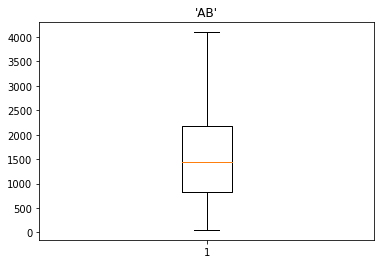

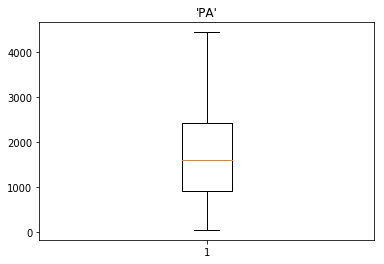

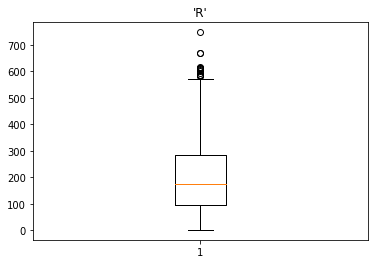

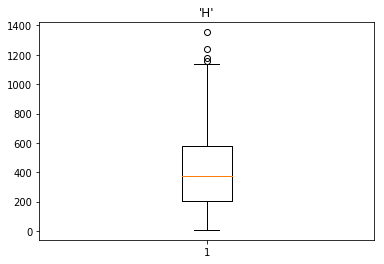

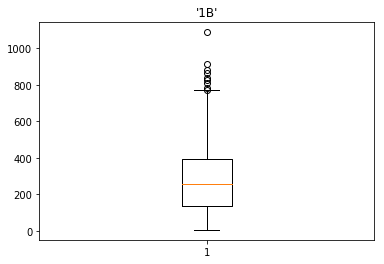

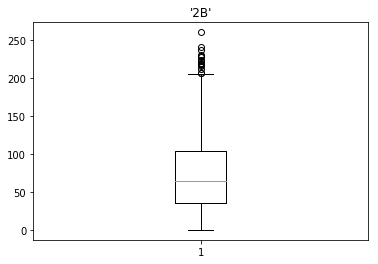

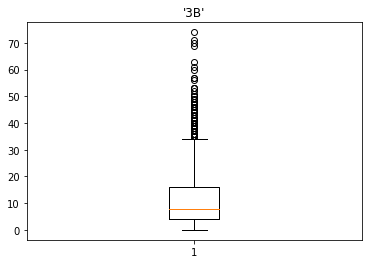

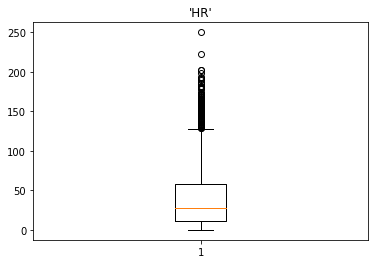

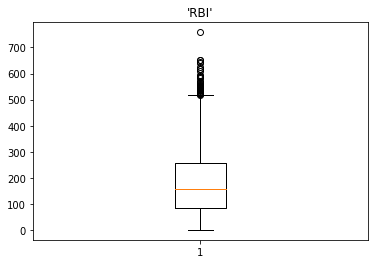

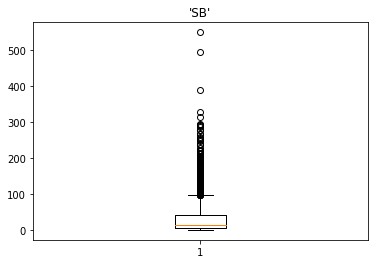

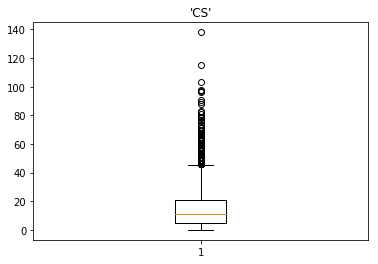

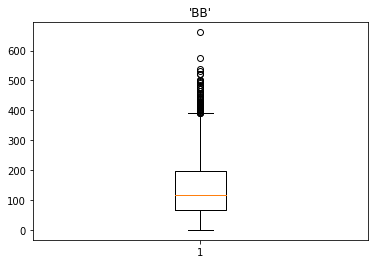

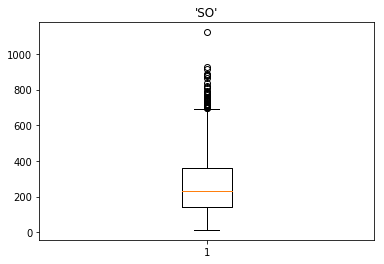

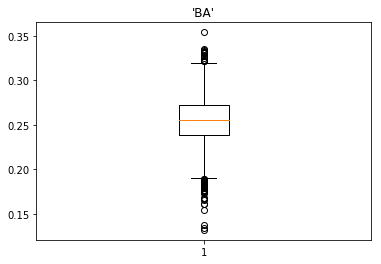

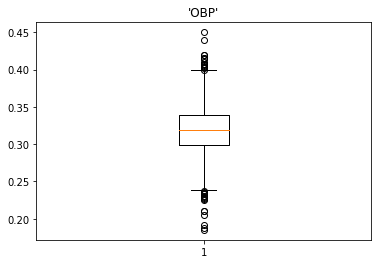

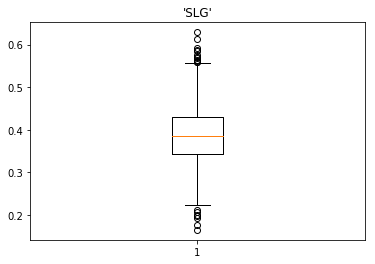

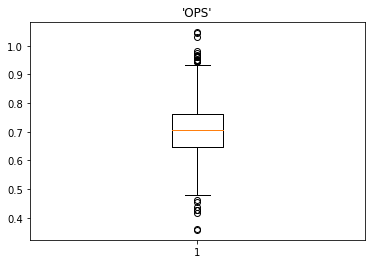

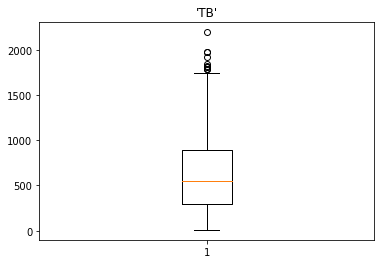

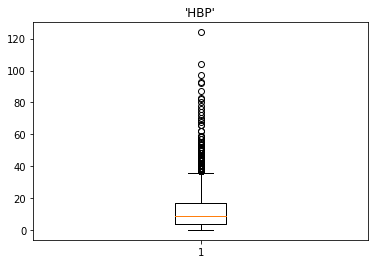

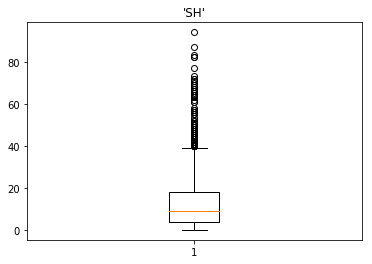

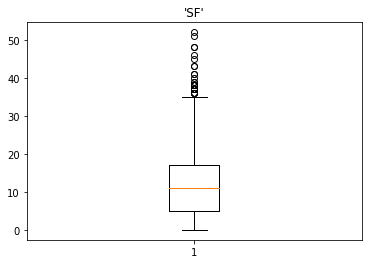

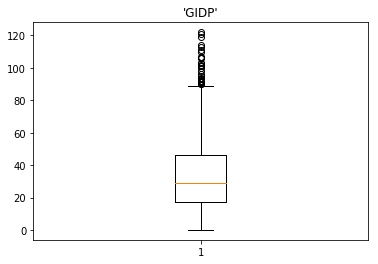

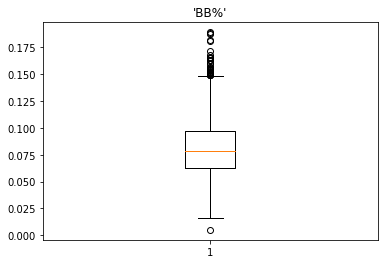

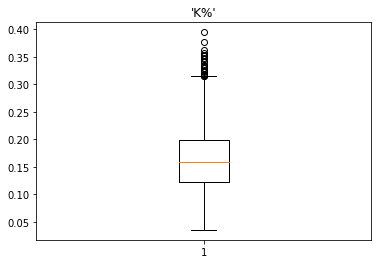

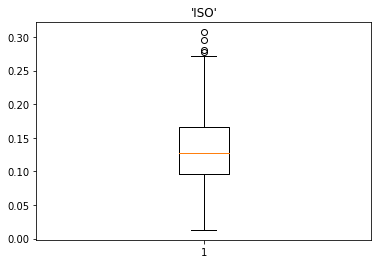

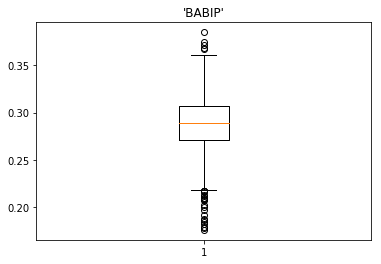

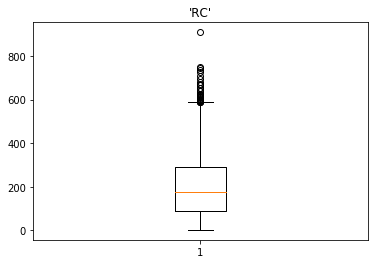

In [3]:
## Creating a new variable `plot_box` to store the `new_cols`
new_cols = ['G', 'AB', 'PA', 'R', 'H', '1B', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'TB', 'HBP',                      'SH', 'SF', 'GIDP', 'BB%', 'K%', 'ISO', 'BABIP', 'RC']

## and be populated with data from the `data` dataframe
plot_box = data[new_cols]

### Creating a for loop that will plot each column in
### the variable `plot_box` as long as it is a column
for i in range(len(plot_box.columns)):
    plt.boxplot(plot_box.iloc[:,i].dropna())
### For each title, we are using the name of the column
### as it appears in the `plot_box` variable    
    plt.title('%a' % plot_box.columns[i])
### Ultimately showing the boxplot at the end of 
### the for loop
    plt.show();

In [20]:
# Defining the function 'iqr_outliers' to help with outliers

def iqr_outliers(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

for i in data.columns:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = iqr(data[i])
    data[i]=data[i].apply(lambda x: iqr_outliers(x))